<a href="https://colab.research.google.com/github/raviyadav44/Different_EDA_techiniques/blob/main/handling_missing_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/titanic/titanic.csv")
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
df.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

THERE IS SOME RELATION BTWEEN Missing Age and cabin value.

In [118]:
df[df['embarked'].isnull()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


so embarked and age is a good example of missing completly at random so they are MCAR. 

###Missing Data Not at Random
 so which means there is some relation ship between the different missing data. it this ccase its like age and cabin could have som relation ship.

In [119]:
df['cabin_null']=np.where(df['cabin'].isnull(),1,0)

###find the percentage of null value
df['cabin_null'].mean()

0.7710437710437711

In [120]:
df['cabin_null'].head()

0    1
1    0
2    1
3    0
4    1
Name: cabin_null, dtype: int64

In [121]:
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'cabin_null'],
      dtype='object')

In [122]:
df.groupby(['survived'])['cabin_null'].mean()

survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

###Missing at random
Men---hide their Salary
<br> Women---hide their age
<br>may have relation


### All the techiniques of handling,missing values

1. Mean/Mean/Mode replacement
2. Random Sample Imputation
3. Capturing NAN vaues with a new feature
4. End of Distribution Imputation
5. Arbitrary Imputation
6. Frequent categories imputation

#mean median mode
when should we apply ?
1. it has the assumption that the data are missing completely at random(MCAR)
<br>
we solve this by replacing the NAN with  the most frequent occurance of the variables

In [123]:
df=pd.read_csv('/content/drive/MyDrive/titanic/titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [124]:
###lets see % of missing values
df.isnull().mean()

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64

In [125]:
def impute_nan(df,variable,median):
  df[variable+'_median']=df[variable].fillna(median)

In [126]:
median=df.age.median()
median

28.0

In [127]:
impute_nan(df,'age',median)

In [128]:
df.head()

,survived,age,fare,age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [129]:
print(df['age'].std())
print(df['age_median'].std())

14.526497332334044
13.019696550973194


In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

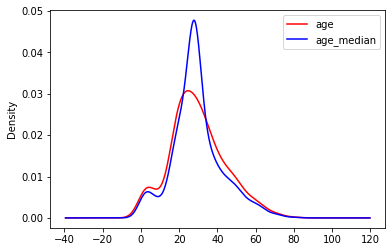

In [131]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax,color='red')
df.age_median.plot(kind='kde',ax=ax,color='blue')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

###advantages and disadvantages of mean/median imptation
<br>

###advantages
1. easy to implement(Robust to outlier)
2. Faster way to obtain the complete dataset

###disadvantages
1. change or distortion of the original variance
2. impact on correlation

##Random Sample Imputation

Aim:Random Sample imputation is similar to mean/median/mode.[it consists of taking random observation from the dataset and we use this observation to replace the nan values

assumtion:
when data is MCAR.

<br>
also while giving the features to model we will be using median and random column [not age column ]

In [132]:
df=pd.read_csv('/content/drive/MyDrive/titanic/titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [133]:
df.isnull().sum()

survived      0
age         177
fare          0
dtype: int64

In [134]:
df.isnull().mean()

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64

In [135]:
df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: age, Length: 177, dtype: float64

In [136]:
def impute_nan(df,variable,median):
  df[variable+'_median']=df[variable].fillna(median)
  df[variable+"_random"]=df[variable]
  ##it will have the random sample to fill the na
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  ##pandas need to have same index in order to merge the dataset
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [137]:
median=df.age.median()
median

28.0

In [138]:
impute_nan(df,'age',median)

In [139]:
df.head()

,survived,age,fare,age_median,age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


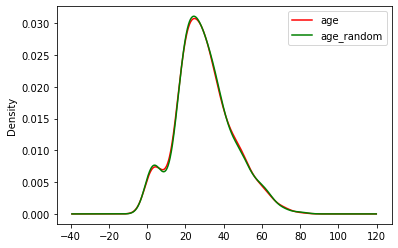

In [140]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax,color='red')
df.age_random.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

the distortion of variance not happen which is a problem in mean/median.

###advantage

1. Easy to implement
2. no distortion in variance

###disadvantage

1. Every situation randomness won't work


###Capturing NAN vaues with a new feature

works well when you have data not missing at completely at random

In [141]:
df=pd.read_csv('/content/drive/MyDrive/titanic/titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [142]:
df['age_Nan']=np.where(df['age'].isnull(),1,0)

In [143]:
df.head()

,survived,age,fare,age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [144]:
df['age'].fillna(df.age.median(),inplace=True)

###Advantages

1. Easy to implement
2. captures the importance of missing values
<br>
 note:
 <br>
while building the model we will be using both the columns c1-with which we have replaced the nan value with median
 <br>
 c2-column with values or having 1 where nan is present 0 where the no nan value will be there.

###Disadavantage
 1. Creating additional Features(Curse of Dimensionality)

#End of Distribution imputation

note: when to use?<br>
missing data not at random

In [145]:
df=pd.read_csv('/content/drive/MyDrive/titanic/titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


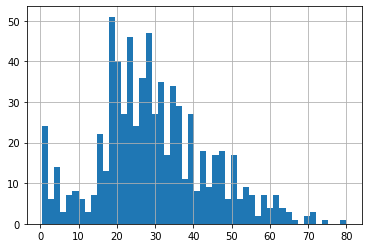

In [146]:
df.age.hist(bins=50)

In [147]:
extreme=df.age.mean()+3*df.age.std()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


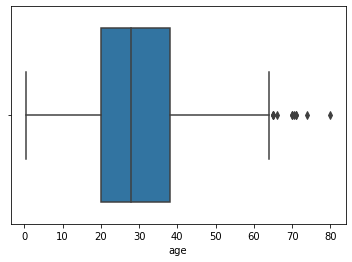

In [148]:
import seaborn as sns
sns.boxplot('age',data=df)

In [149]:
def impute_nan(df,variable,median,extreme):
  df[variable+'_end_distribution']=df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

In [150]:
impute_nan(df,'age',df.age.median(),extreme)

In [151]:
df.head()

,survived,age,fare,age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


###Advantage

1. easy to implement
2. Captures the importance of missingess if there is one

###Disadvantage

1. distorsts the original distribution of the variable
2. if missingess is not important, it may mask the preditive power of the original variable by distorting its distribution
3. if the number of NA is big, it will mask true outliers in the distribution
4. if the numbers of NA is small ,the replaced NA may be considered an outlier and pre-processed in a subsequent feature engineering.

#Arbitrary imputation

this techinique was derived from kaggle competition,
it consists of replacing Nan by an arbitrary value 

In [152]:
df=pd.read_csv('/content/drive/MyDrive/titanic/titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


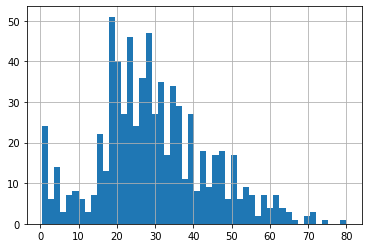

In [153]:
df['age'].hist(bins=50)

#Arbitary values

### It should not be more frequently present

###when it is used?
 1. findout the importance of the misssing values.

In [154]:
def impute_nan(df,variable):
  df[variable+'_zero']=df[variable].fillna(0)
  df[variable+'_hundred']=df[variable].fillna(100)

In [155]:
impute_nan(df,'age')

In [156]:
df.head()

,survived,age,fare,age_zero,age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


##Advantages

- easy to implement
- captures the importance of missingness if there is one

##Disadvantages

* Discorts the original distribution of the variable 
* If missingness is not important , it may mask the predictive power of the original variable by distorting its distribution
* Hard to decide which value to use

#Catgoriacal variable

1. Frequent Category Imputation


In [157]:
df=pd.read_csv("/content/drive/MyDrive/titanic/advance_house_price_prediction.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [158]:
df.shape

(1460, 81)

In [159]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [160]:
df=pd.read_csv("/content/drive/MyDrive/titanic/advance_house_price_prediction.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [161]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [162]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [163]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

since the BsmtQual and GarageType is having the less number of missing values so we can replace it with most frequent values of that columns.

#compute the frequency with every feature 

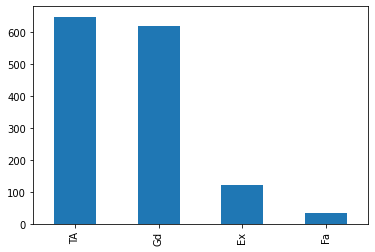

In [164]:
df['BsmtQual'].value_counts().plot.bar()

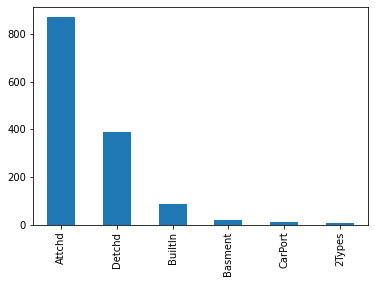

In [165]:
df['GarageType'].value_counts().plot.bar()

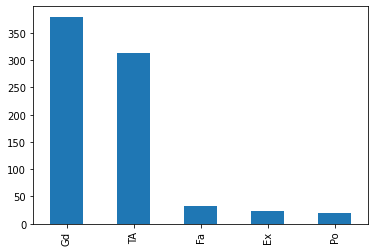

In [166]:
df['FireplaceQu'].value_counts().plot.bar()

In [167]:
def impute_nan(df,variable):
  most_frequent_category=df[variable].mode()[0]
  df[variable].fillna(most_frequent_category,inplace=True)


In [168]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan(df,features)


In [169]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

  This should not we done with features having large missing values. 

#Advantage

1. easy to implement
2. Faster way to implement

#Disadvantage

1. Since we ae using the more frequent lables, it may use them in an over represented way, if there aremany nan.
2. it distort the relation of the most fequent label.

#Adding a variable to capture NAN [ most used techinique]

In [170]:
  df=pd.read_csv("/content/drive/MyDrive/titanic/advance_house_price_prediction.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [171]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [172]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [173]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [174]:
frequent=df['BsmtQual'].mode()[0]

In [175]:
frequent

'TA'

In [176]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [177]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [178]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [179]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


###suppose if you have more frequent categories , we just replace NaN with a new category

In [180]:
  df=pd.read_csv("/content/drive/MyDrive/titanic/advance_house_price_prediction.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [181]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [182]:
def impute_nan(df,variable):
  df[variable+"newvar"]=np.where(df[variable].isnull(),'miss',df[variable])

In [183]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan(df,features)

In [184]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,miss,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


so after that we will we using only the new features and dropping the previous features like in this case we drop all features columns like 'BsmtQual' and use 'BsmtQual_var' and so on.

In [185]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,miss,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


###Handle Categorical Features

###One hot Encoding

In [186]:
import pandas as pd

In [187]:
df=pd.read_csv('/content/drive/MyDrive/titanic/titanic.csv',usecols=['sex','survived'])
df.head()

,survived,sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


#1. One hot encoding

In [188]:
pd.get_dummies(df).head()

,survived,sex_female,sex_male
0,0,0,1
1,1,1,0
2,1,1,0
3,1,1,0
4,0,0,1


In [189]:
pd.get_dummies(df,drop_first=True).head()

,survived,sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [190]:
df=pd.read_csv('/content/drive/MyDrive/titanic/titanic.csv',usecols=['embarked'])
df.head()

,embarked
0,S
1,C
2,S
3,S
4,S


In [191]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [192]:
df.dropna(inplace=True)

In [193]:
pd.get_dummies(df,drop_first=True).head()

,embarked_Q,embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


###Disadvantage

1. curse of dimensionality

In [194]:
df=pd.read_csv('/content/drive/MyDrive/titanic/mercedes.csv', usecols=['X0','X1','X2','X3','X4','X5','X6'])

In [195]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [196]:
for i in df.columns:
  print(df[i].value_counts())

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
l      16
aw     16
ad     14
k      11
au     11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
g       1
ac      1
ab      1
Name: X0, dtype: int64
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
q       3
ab      3
d       3
Name: X1, dtype: int64
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
ag      19
z    

In [197]:
df['X0'].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
l      16
aw     16
ad     14
k      11
au     11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
g       1
ac      1
ab      1
Name: X0, dtype: int64

In [198]:
 df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

so what we are doing we are just taking top 10 most occuring variables and doing one-hotencoding only to those variables only.

In [199]:
lst_10= df.X1.value_counts().sort_values(ascending=False).head(10).index

In [200]:
lst_10

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [201]:
import numpy as np
for categories in lst_10:
  df['X1_'+categories]=np.where(df['X1']==categories,1,0)

In [203]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,k,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0
